# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Load Data and Feature Engineering

In [12]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [159]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(373028, 324)
(373028, 1)
(93257, 324)
(93257, 1)


In [160]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:oth__med__vacation',
    'purpose:major_purch__car__home_impr',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issue_d:<38',
    'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41',
    'mths_since_issue_d:42-48',
    'mths_since_issue_d:49-52',
    'mths_since_issue_d:53-64',
    'mths_since_issue_d:65-84',
    'mths_since_issue_d:>84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:141-164',
    'mths_since_earliest_cr_line:165-247',
    'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352',
    'mths_since_earliest_cr_line:>352',
    'delinq_2yrs:0',
    'delinq_2yrs:1-3',
    'delinq_2yrs:>=4',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'open_acc:0',
    'open_acc:1-3',
    'open_acc:4-12',
    'open_acc:13-17',
    'open_acc:18-22',
    'open_acc:23-25',
    'open_acc:26-30',
    'open_acc:>=31',
    'pub_rec:0-2',
    'pub_rec:3-4',
    'pub_rec:>=5',
    'total_acc:<=27',
    'total_acc:28-51',
    'total_acc:>=52',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'total_rev_hi_lim:<=5K',
    'total_rev_hi_lim:5K-10K',
    'total_rev_hi_lim:10K-20K',
    'total_rev_hi_lim:20K-30K',
    'total_rev_hi_lim:30K-40K',
    'total_rev_hi_lim:40K-55K',
    'total_rev_hi_lim:55K-95K',
    'total_rev_hi_lim:>95K',
    'annual_inc:<20K',
    'annual_inc:20K-30K',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>140K',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>=86']]

In [161]:
ref_categories = ['grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>84',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'delinq_2yrs:>=4',
    'inq_last_6mths:>6',
    'open_acc:0',
    'pub_rec:0-2',
    'total_acc:<=27',
    'acc_now_delinq:0',
    'total_rev_hi_lim:<=5K',
    'annual_inc:<20K',
    'dti:>35',
    'mths_since_last_delinq:0-3',
    'mths_since_last_record:0-2']

In [162]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [164]:
reg = LogisticRegression()
pd.options.display.max_rows = None

In [165]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [166]:
reg.intercept_

array([-1.30510393])

In [167]:
reg.coef_

array([[ 1.15384687,  0.90206148,  0.70474224,  0.51378647,  0.33148379,
         0.14038402,  0.09213675,  0.10653056,  0.03270092,  0.05586374,
         0.05688663,  0.05981672,  0.07566447,  0.13309015,  0.09666713,
         0.18203255,  0.23378525,  0.22106307,  0.26017087,  0.31753687,
         0.51689009,  0.0875828 , -0.0100615 ,  0.30551181,  0.20258716,
         0.21531168,  0.26863513,  0.05361536,  0.07697852,  0.10068005,
         0.12647724,  0.09168556,  0.06132414,  0.12403475,  1.08494814,
         0.88301204,  0.78301267,  0.57972772,  0.41741068,  0.1713985 ,
        -0.06564659,  0.85475074,  0.53917887,  0.29158502,  0.10366258,
         0.05837015,  0.04074567,  0.08236567,  0.12324354,  0.13010599,
         0.0692624 ,  0.03237472,  0.67598825,  0.53200164,  0.32342279,
        -0.00369941, -0.10135194, -0.12657043, -0.14186781, -0.14567462,
        -0.1087192 , -0.19918292,  0.11982093,  0.17428078, -0.02080309,
         0.02280527,  0.22807499,  0.03647202,  0.0

In [168]:
feature_name = inputs_train.columns.values

In [169]:
summary_table = pd.DataFrame(columns = ['feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,feature name,Coefficients
0,intercept,-1.305104
1,grade:A,1.153847
2,grade:B,0.902061
3,grade:C,0.704742
4,grade:D,0.513786
5,grade:E,0.331484
6,grade:F,0.140384
7,home_ownership:OWN,0.092137
8,home_ownership:MORTGAGE,0.106531
9,addr_state:NM_VA,0.032701


# Build a Logistic Regression Model with P-Values

In [170]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [171]:
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [172]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.305104
1,grade:A,1.153847
2,grade:B,0.902061
3,grade:C,0.704742
4,grade:D,0.513786
5,grade:E,0.331484
6,grade:F,0.140384
7,home_ownership:OWN,0.092137
8,home_ownership:MORTGAGE,0.106531
9,addr_state:NM_VA,0.032701


In [173]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))

In [174]:
summary_table['p_values'] = np.around(p_values, decimals = 4)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.305104,NaN
1,grade:A,1.153847,0.0000
2,grade:B,0.902061,0.0000
3,grade:C,0.704742,0.0000
4,grade:D,0.513786,0.0000
5,grade:E,0.331484,0.0000
6,grade:F,0.140384,0.0051
7,home_ownership:OWN,0.092137,0.0000
8,home_ownership:MORTGAGE,0.106531,0.0000
9,addr_state:NM_VA,0.032701,0.3077


### If the coefficients for none of the dummy variables are significant, we should remove. Otherwise, keep all of the dummy variables. If P-Values is below 0.05, it means the variable is significant.

- e.g. grades and home ownership are signidicant
- e.g. verification_status  is still significant
- e.g. delinq_2yrs,pub_rec, total_acc, open_acc not significant (need to remove)

- e.g. total_rev_hi_lim only has 1 out of 5 dummy variable that is significant, therefore, can be removed

In [175]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:oth__med__vacation',
    'purpose:major_purch__car__home_impr',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issue_d:<38',
    'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41',
    'mths_since_issue_d:42-48',
    'mths_since_issue_d:49-52',
    'mths_since_issue_d:53-64',
    'mths_since_issue_d:65-84',
    'mths_since_issue_d:>84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:141-164',
    'mths_since_earliest_cr_line:165-247',
    'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352',
    'mths_since_earliest_cr_line:>352',
#     'delinq_2yrs:0',
#     'delinq_2yrs:1-3',
#     'delinq_2yrs:>=4',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
#     'open_acc:0',
#     'open_acc:1-3',
#     'open_acc:4-12',
#     'open_acc:13-17',
#     'open_acc:18-22',
#     'open_acc:23-25',
#     'open_acc:26-30',
#     'open_acc:>=31',
#     'pub_rec:0-2',
#     'pub_rec:3-4',
#     'pub_rec:>=5',
#     'total_acc:<=27',
#     'total_acc:28-51',
#     'total_acc:>=52',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
#     'total_rev_hi_lim:<=5K',
#     'total_rev_hi_lim:5K-10K',
#     'total_rev_hi_lim:10K-20K',
#     'total_rev_hi_lim:20K-30K',
#     'total_rev_hi_lim:30K-40K',
#     'total_rev_hi_lim:40K-55K',
#     'total_rev_hi_lim:55K-95K',
#     'total_rev_hi_lim:>95K',
    'annual_inc:<20K',
    'annual_inc:20K-30K',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>140K',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>=86']]

In [176]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [177]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [178]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
feature_name = inputs_train.columns.values

In [180]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.285478
1,grade:A,1.141219
2,grade:B,0.885134
3,grade:C,0.690067
4,grade:D,0.502034
5,grade:E,0.326603
6,grade:F,0.136833
7,home_ownership:OWN,0.091909
8,home_ownership:MORTGAGE,0.106068
9,addr_state:NM_VA,0.028894


In [181]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = np.around(p_values, decimals = 4)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.285478,NaN
1,grade:A,1.141219,0.0000
2,grade:B,0.885134,0.0000
3,grade:C,0.690067,0.0000
4,grade:D,0.502034,0.0000
5,grade:E,0.326603,0.0000
6,grade:F,0.136833,0.0053
7,home_ownership:OWN,0.091909,0.0000
8,home_ownership:MORTGAGE,0.106068,0.0000
9,addr_state:NM_VA,0.028894,0.3668


In [182]:
import pickle
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# PD Model Validation

In [183]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:oth__med__vacation',
    'purpose:major_purch__car__home_impr',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issue_d:<38',
    'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41',
    'mths_since_issue_d:42-48',
    'mths_since_issue_d:49-52',
    'mths_since_issue_d:53-64',
    'mths_since_issue_d:65-84',
    'mths_since_issue_d:>84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:141-164',
    'mths_since_earliest_cr_line:165-247',
    'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352',
    'mths_since_earliest_cr_line:>352',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'annual_inc:<20K',
    'annual_inc:20K-30K',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>140K',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>=86']]

ref_categories = ['grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>84',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'annual_inc:<20K',
    'dti:>35',
    'mths_since_last_delinq:0-3',
    'mths_since_last_record:0-2']

In [184]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [185]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [186]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

#see the proability of not default
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba

array([0.92430821, 0.84650386, 0.88566594, ..., 0.97329466, 0.95988081,
       0.95238245])

In [187]:
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
loan_data_targets_test_temp.head()

,good_bad
0,1
1,1
2,1
3,1
4,1


In [188]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, 
                                       pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924308
288564,1,0.846504
213591,1,0.885666
263083,1,0.940737
165001,1,0.968782


# Accuracy Test and Area Under Curve

In [189]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [190]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], 
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7379,2811
1,35799,47268


In [191]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], 
            colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079125,0.030143
1,0.383875,0.506857


In [192]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
             df_actual_predicted_probs['y_hat_test'],
             rownames = ['Actual'], 
             colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
                                                                                                       df_actual_predicted_probs['y_hat_test'],
             
             rownames = ['Actual'], 
             colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5859828216648616

### Accuracy is not the universal measure for a PD model

In [193]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

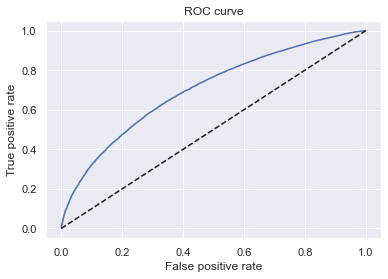

In [195]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [196]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7021157560682686

# Gini and Kolmogorov-Smirnov

In [197]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,39810,0,0.393244,0
1,42341,1,0.393928,0
2,42344,1,0.417324,0
3,40518,0,0.448182,0
4,40173,0,0.468557,0


#### Find the cumulative good and bad population

In [198]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,39810,0,0.393244,0,1,0,1
1,42341,1,0.393928,0,2,1,1
2,42344,1,0.417324,0,3,2,1
3,40518,0,0.448182,0,4,2,2
4,40173,0,0.468557,0,5,2,3


In [199]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,39810,0,0.393244,0,1,0,1,0.000011,0.000000,0.000098
1,42341,1,0.393928,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.417324,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448182,0,4,2,2,0.000043,0.000024,0.000196
4,40173,0,0.468557,0,5,2,3,0.000054,0.000024,0.000294


#### Cumulative in terms of percentage

Text(0.5, 1.0, 'Gini')

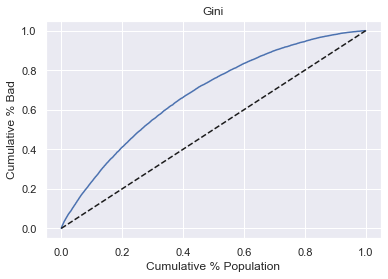

In [200]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], 
         df_actual_predicted_probs['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], 
         df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')

plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [201]:
Gini = AUROC * 2 - 1
Gini

0.4042315121365372

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

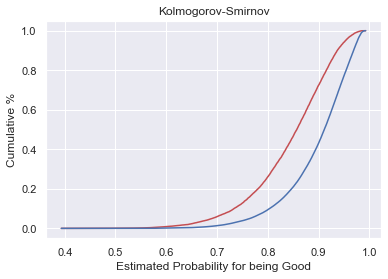

In [202]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], 
         df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')

plt.plot(df_actual_predicted_probs['y_hat_test_proba'], 
         df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')

plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [203]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29652196762363797

# Applying the PD Model

### Calculating PD of individual accounts 

In [204]:
pd.options.display.max_columns = None

In [205]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [206]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.285478,NaN
1,grade:A,1.141219,0.0000
2,grade:B,0.885134,0.0000
3,grade:C,0.690067,0.0000
4,grade:D,0.502034,0.0000
5,grade:E,0.326603,0.0000
6,grade:F,0.136833,0.0053
7,home_ownership:OWN,0.091909,0.0000
8,home_ownership:MORTGAGE,0.106068,0.0000
9,addr_state:NM_VA,0.028894,0.3668


In [207]:
y_hat_test_proba

array([0.92430821, 0.84650386, 0.88566594, ..., 0.97329466, 0.95988081,
       0.95238245])

### Create Scoreboard

In [208]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [209]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [210]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.285478,NaN,Intercept
1,1,grade:A,1.141219,0.0000,grade
2,2,grade:B,0.885134,0.0000,grade
3,3,grade:C,0.690067,0.0000,grade
4,4,grade:D,0.502034,0.0000,grade
5,5,grade:E,0.326603,0.0000,grade
6,6,grade:F,0.136833,0.0053,grade
7,7,home_ownership:OWN,0.091909,0.0000,home_ownership
8,8,home_ownership:MORTGAGE,0.106068,0.0000,home_ownership
9,9,addr_state:NM_VA,0.028894,0.3668,addr_state


In [211]:
min_score = 300
max_score = 850

In [212]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.285478
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.079788
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.062583
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.010895
Name: Coefficients, dtype: float64

In [213]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.43874506223422

In [214]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.285478
acc_now_delinq                 0.201684
addr_state                     0.516382
annual_inc                     0.557062
dti                            0.377527
emp_length                     0.126244
grade                          1.141219
home_ownership                 0.106068
initial_list_status            0.054367
inq_last_6mths                 0.655859
int_rate                       0.872003
mths_since_earliest_cr_line    0.128505
mths_since_issue_d             1.091351
mths_since_last_delinq         0.205905
mths_since_last_record         0.397450
purpose                        0.305107
term                           0.078434
verification_status            0.084616
Name: Coefficients, dtype: float64

In [215]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.614305567019871

In [216]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

<ipython-input-216-897c5f2a602c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.285478,NaN,Intercept,311.951799,312.0
1,1,grade:A,1.141219,0.0000,grade,88.992791,89.0
2,2,grade:B,0.885134,0.0000,grade,69.023148,69.0
3,3,grade:C,0.690067,0.0000,grade,53.811749,54.0
4,4,grade:D,0.502034,0.0000,grade,39.148859,39.0
5,5,grade:E,0.326603,0.0000,grade,25.468641,25.0
6,6,grade:F,0.136833,0.0053,grade,10.670261,11.0
7,7,home_ownership:OWN,0.091909,0.0000,home_ownership,7.167110,7.0
8,8,home_ownership:MORTGAGE,0.106068,0.0000,home_ownership,8.271196,8.0
9,9,addr_state:NM_VA,0.028894,0.3668,addr_state,2.253133,2.0


In [217]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [218]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

849.0

In [219]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

<ipython-input-219-f4f54c309bab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.285478,NaN,Intercept,311.951799,312.0,0.048201,312.0
1,1,grade:A,1.141219,0.0000,grade,88.992791,89.0,0.007209,89.0
2,2,grade:B,0.885134,0.0000,grade,69.023148,69.0,-0.023148,69.0
3,3,grade:C,0.690067,0.0000,grade,53.811749,54.0,0.188251,54.0
4,4,grade:D,0.502034,0.0000,grade,39.148859,39.0,-0.148859,39.0
5,5,grade:E,0.326603,0.0000,grade,25.468641,25.0,-0.468641,25.0
6,6,grade:F,0.136833,0.0053,grade,10.670261,11.0,0.329739,11.0
7,7,home_ownership:OWN,0.091909,0.0000,home_ownership,7.167110,7.0,-0.167110,7.0
8,8,home_ownership:MORTGAGE,0.106068,0.0000,home_ownership,8.271196,8.0,-0.271196,8.0
9,9,addr_state:NM_VA,0.028894,0.3668,addr_state,2.253133,2.0,-0.253133,2.0


In [220]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [221]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

849.0

# Calculating Credit Score

In [222]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [223]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.285478,NaN,Intercept,311.951799,312.0,0.048201,312.0
1,1,grade:A,1.141219,0.0000,grade,88.992791,89.0,0.007209,89.0
2,2,grade:B,0.885134,0.0000,grade,69.023148,69.0,-0.023148,69.0
3,3,grade:C,0.690067,0.0000,grade,53.811749,54.0,0.188251,54.0
4,4,grade:D,0.502034,0.0000,grade,39.148859,39.0,-0.148859,39.0
5,5,grade:E,0.326603,0.0000,grade,25.468641,25.0,-0.468641,25.0
6,6,grade:F,0.136833,0.0053,grade,10.670261,11.0,0.329739,11.0
7,7,home_ownership:OWN,0.091909,0.0000,home_ownership,7.167110,7.0,-0.167110,7.0
8,8,home_ownership:MORTGAGE,0.106068,0.0000,home_ownership,8.271196,8.0,-0.271196,8.0
9,9,addr_state:NM_VA,0.028894,0.3668,addr_state,2.253133,2.0,-0.253133,2.0


In [224]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
scorecard_scores = df_scorecard['Score - Final']
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [225]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [230]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)
scorecard_scores.shape

(102, 1)

### Generating score for test data

In [241]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
362514,607.0
288564,544.0
213591,573.0
263083,627.0
165001,680.0


### Generating Final Scorecard (Easy to use)

In [238]:
final_scorecard = pd.DataFrame(scorecard_scores, 
                               columns = ['Score'],
                               index = [df_scorecard['Feature name'].values])
final_scorecard

,Score
Intercept,312.0
grade:A,89.0
grade:B,69.0
grade:C,54.0
grade:D,39.0
grade:E,25.0
grade:F,11.0
home_ownership:OWN,7.0
home_ownership:MORTGAGE,8.0
addr_state:NM_VA,2.0


# From Credit Score to PD

In [242]:
# y_scores is the score of every person in the test dataset
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [243]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.924011
288564,0.844256
213591,0.887168
263083,0.940173
165001,0.968759


In [246]:
y_hat_test_proba[0: 5]

array([0.92430821, 0.84650386, 0.88566594, 0.94073658, 0.96878159])

# Cutoffs

Text(0.5, 1.0, 'ROC curve')

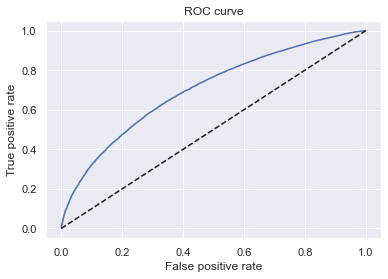

In [248]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [249]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992670,0.000000,0.000000
1,0.992670,0.000000,0.000012
2,0.990715,0.000000,0.000120
3,0.990678,0.000098,0.000120
4,0.989778,0.000098,0.000445


In [251]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2077.0
1,0.992670,0.000000,0.000012,795.0
2,0.990715,0.000000,0.000120,776.0
3,0.990678,0.000098,0.000120,776.0
4,0.989778,0.000098,0.000445,769.0


In [252]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992670,0.000000,0.000012,795.0
2,0.990715,0.000000,0.000120,776.0
3,0.990678,0.000098,0.000120,776.0
4,0.989778,0.000098,0.000445,769.0


In [253]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [254]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992670,0.000000,0.000012,795.0,1,93256,0.000011,0.999989
2,0.990715,0.000000,0.000120,776.0,10,93247,0.000107,0.999893
3,0.990678,0.000098,0.000120,776.0,11,93246,0.000118,0.999882
4,0.989778,0.000098,0.000445,769.0,38,93219,0.000407,0.999593


In [258]:
df_cutoffs

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992670,0.000000,0.000012,795.0,1,93256,0.000011,0.999989
2,0.990715,0.000000,0.000120,776.0,10,93247,0.000107,0.999893
3,0.990678,0.000098,0.000120,776.0,11,93246,0.000118,0.999882
4,0.989778,0.000098,0.000445,769.0,38,93219,0.000407,0.999593
...,...,...,...,...,...,...,...,...
17347,0.488999,0.999607,0.999964,409.0,93250,7,0.999925,0.000075
17348,0.484370,0.999607,0.999976,407.0,93251,6,0.999936,0.000064
17349,0.448182,0.999902,0.999976,396.0,93254,3,0.999968,0.000032
17350,0.393928,0.999902,1.000000,379.0,93256,1,0.999989,0.000011


In [259]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')
df_scorecard.to_csv('df_scorecard.csv')